In [2]:
import pandas as pd

df = pd.read_csv('patient.csv', usecols=[0, 3, 4, 5, 6, 8, 9, 10, 12, 13])
df.head()

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state
0,1.0,China,filtered at airport,NaN,visit to Wuhan,NaN,45.0,2020-01-20,NaN,released
1,2.0,Korea,filtered at airport,NaN,visit to Wuhan,NaN,75.0,2020-01-24,NaN,released
2,3.0,Korea,capital area,NaN,visit to Wuhan,NaN,16.0,2020-01-26,NaN,released
3,4.0,Korea,capital area,NaN,visit to Wuhan,NaN,95.0,2020-01-27,NaN,released
4,5.0,Korea,capital area,NaN,visit to Wuhan,NaN,31.0,2020-01-30,NaN,released


In [3]:
df['country'].value_counts()

Korea       6274
China          8
Mongolia       1
Name: country, dtype: int64

In [4]:
df['infection_reason'].value_counts()

contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
visit to Thailand                     2
contact with patient in Singapore     2
 visit to China                       1
contact with patient in Japan         1
visit to Italy                        1
visit to Vietnam                      1
visit to China                        1
visit to Shincheonji Church           1
visit to Japan                        1
visit to Cheongdo Daenam Hospital     1
Name: infection_reason, dtype: int64

In [5]:
# .unique()를 사용하면 
# 컬럼 내에 존재하는 각각의 값의 종류를 알 수 있습니다.

df['country'].unique()

array(['China', 'Korea', nan, 'Mongolia'], dtype=object)

In [6]:
df['infection_reason'].unique()

array(['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', nan, 'visit to Daegu', 'pilgrimage to Israel',
       'visit to Vietnam', ' visit to China',
       'visit to Cheongdo Daenam Hospital', 'visit to Shincheonji Church',
       'visit to Japan', 'visit to Italy'], dtype=object)

In [8]:
df['counts'] = 1
trends = df.groupby('confirmed_date').sum()
trends['deceased'] = df.groupby('deceased_date').sum()['counts']
trends.head()

,id,infected_by,contact_number,counts,deceased
confirmed_date,,,,,
2020-01-20,1.0,0.0,45.0,1,NaN
2020-01-24,2.0,0.0,75.0,1,NaN
2020-01-26,3.0,0.0,16.0,1,NaN
2020-01-27,4.0,0.0,95.0,1,NaN
2020-01-30,18.0,3.0,57.0,3,NaN


In [10]:
trends = trends[['counts', 'deceased', 'contact_number']]
trends.tail()

,counts,deceased,contact_number
confirmed_date,,,
2020-03-01,1062,3.0,23.0
2020-03-02,600,3.0,0.0
2020-03-03,516,1.0,0.0
2020-03-04,438,3.0,0.0
2020-03-05,519,NaN,0.0


In [11]:
# 누적 확진자 수
trends['total_counts'] = trends['counts'].cumsum()
trends.tail()

,counts,deceased,contact_number,total_counts
confirmed_date,,,,
2020-03-01,1062,3.0,23.0,4211
2020-03-02,600,3.0,0.0,4811
2020-03-03,516,1.0,0.0,5327
2020-03-04,438,3.0,0.0,5765
2020-03-05,519,NaN,0.0,6284


In [12]:
# 사망률
trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()
trends.tail()

,counts,deceased,contact_number,total_counts,decease_ratio
confirmed_date,,,,,
2020-03-01,1062,3.0,23.0,4211,0.003800
2020-03-02,600,3.0,0.0,4811,0.003949
2020-03-03,516,1.0,0.0,5327,0.003754
2020-03-04,438,3.0,0.0,5765,0.003990
2020-03-05,519,NaN,0.0,6284,NaN


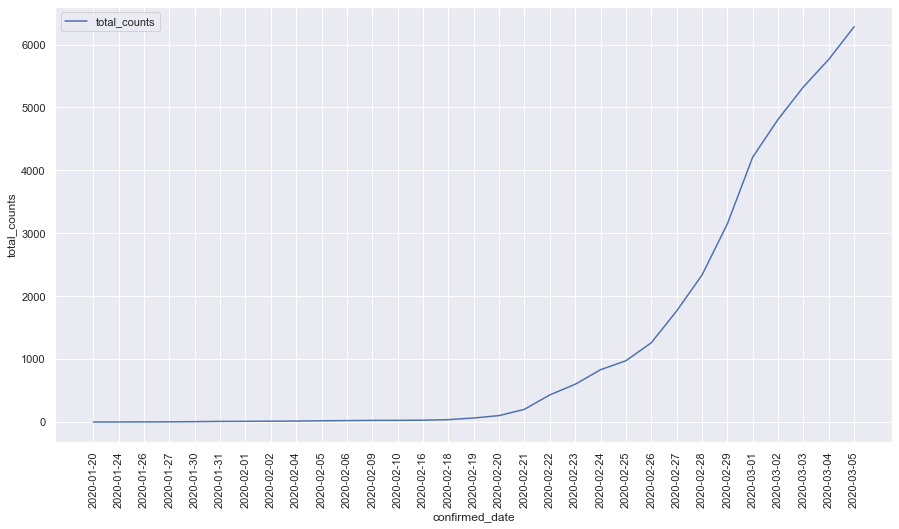

In [13]:
# 누적 확진자 그리기
import matplotlib.pyplot as plt
import seaborn as sns

trends.reset_index(inplace=True); sns.set()

plt.figure(figsize=(15, 8))
sns.lineplot(x='confirmed_date', y='total_counts', label='total_counts', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

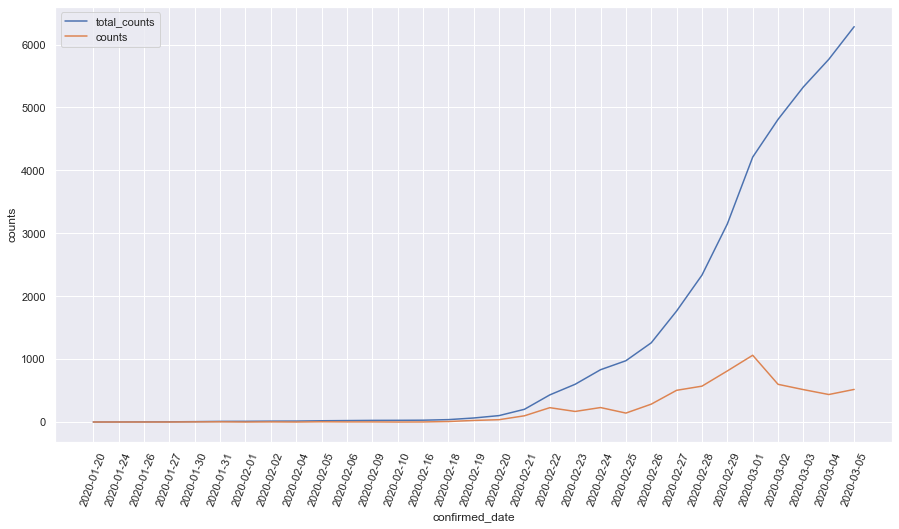

In [14]:
# 누적확지자와 일일 확진자 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(x='confirmed_date', y='total_counts', label='total_counts', data=trends)
sns.lineplot(x='confirmed_date', y='counts', label='counts', data=trends)

plt.xticks(rotation=70)
plt.legend()
plt.show()

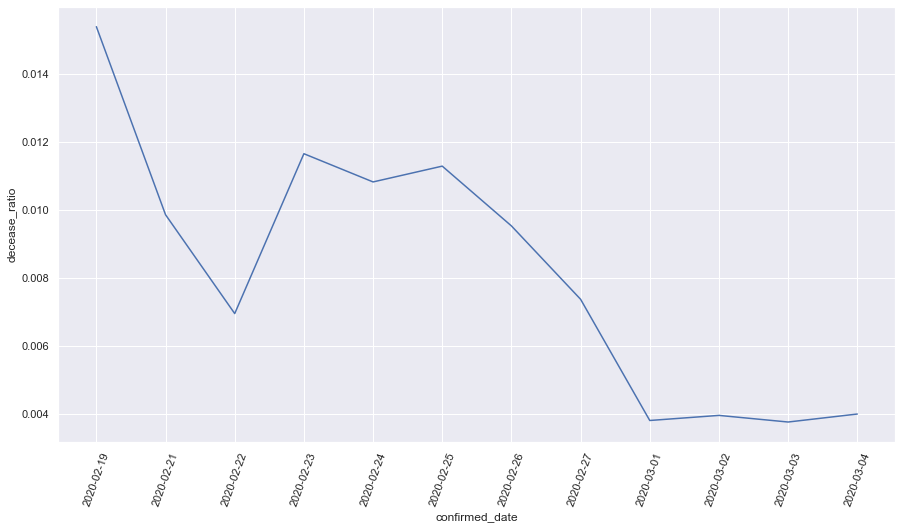

In [17]:
# 사망률 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(x='confirmed_date', y='decease_ratio', data=trends)

plt.xticks(rotation=70)
plt.show()